In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [2]:
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']


In [3]:
len(df_Abstract_uspto)

595466

In [4]:
df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()
df_Abstract_uspto = df_Abstract_uspto.reset_index(drop=True)
df_Abstract_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_14996/868608903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()


,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
595461,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
595462,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
595463,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
595464,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [5]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
df_Abstract_uspto

,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
59995,US07294937,apparatus and method for manufacturing a semic...,a multi layered semiconductor structure with f...,['H01L']
59996,US07262721,methods of and apparatuses for adaptive entrop...,methods and apparatuses are provided for adapt...,['H03M']
59997,US07260826,resource allocation in multi stream ip network...,a resource allocation of multiple compressed a...,['H04N']
59998,US07231525,authentification of data in a digital transmis...,a method of authentification of data sent in a...,"['G06F', 'H04L']"


# preprocessing

In [6]:
def cleantext(df_Abstract_uspto):
    # Remove unwanted characters like quotes, commas, periods, question marks, etc. from the 'Abstract' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # Convert all text to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    # Remove all numbers from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    # Remove all non-alphanumeric characters from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Remove all punctuation from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    # Remove all URLs from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    
    # Replace multiple spaces with a single space
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

# Call the 'cleantext' function on the 'df_Abstract_uspto' dataframe
df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_14996/2232787442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
C:\Users\admin\AppData\Local\Temp/ipykernel_14996/2232787442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
C:\Users\admin\AppData\Local\Temp/ipykernel_1

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_14996/2358027427.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [8]:
# import the WordNetLemmatizer class from the nltk library
from nltk.stem import WordNetLemmatizer

# create an instance of the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()

# define a function to lemmatize words in a text
def lemmatize_words(text):
    # split the text into individual words, lemmatize each word, and join them back together into a string
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# apply the lemmatize_words function to the cleaned abstract text without stopwords column of the dataframe
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# view the updated dataframe with the new lemmatized abstract column
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_14996/1233588646.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'text' column
df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)
df_Abstract_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_14996/3692672784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."


# divide the dataset

In [10]:
df_Abstract_30K=df_Abstract_uspto[:30000]
df_Abstract_30K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."
...,...,...,...,...,...,...,...,...
29995,US07086456,combination of fan and heat sink,a combination of fan and heat sink includes a ...,['H05K'],a combination of fan and heat sink includes a ...,combination fan heat sink fan heat sink four f...,combination fan heat sink fan heat sink four f...,"[combination, fan, heat, sink, fan, heat, sink..."
29996,US07086512,headset cable retraction system,a headset cable retraction system and device i...,['H02G'],a headset cable retraction system and device i...,headset cable retraction housing housing cavit...,headset cable retraction housing housing cavit...,"[headset, cable, retraction, housing, housing,..."
29997,US07086453,integrated liquid cooling system for electrica...,a liquid cooling system includes a cooling bod...,"['H05K', 'F28F']",a liquid cooling system includes a cooling bod...,liquid cooling cooling body liquid circulation...,liquid cooling cooling body liquid circulation...,"[liquid, cooling, cooling, body, liquid, circu..."
29998,US07086603,data collection system having a data collector,a system for collecting data in a room the sys...,"['H05K', 'G05D']",a system for collecting data in a room the sys...,collecting room sensor devices positioned loca...,collecting room sensor device positioned locat...,"[collecting, room, sensor, device, positioned,..."


In [11]:
New_Sample = df_Abstract_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
59394,US07187658,data transmission apparatus selecting efficien...,a data transmission apparatus is provided for ...,"['G06F', 'H04L']",a data transmission apparatus is provided for ...,transmission provided transmitting received us...,transmission provided transmitting received us...,"[transmission, provided, transmitting, receive..."


In [12]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

# LDA on 30K patent

In [13]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_30K['Lemmatized-Abstract']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model

#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
#docs = [quadgram_phraser[trigram_phrases[bigram_phrases[doc]]] for doc in docs]

docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Train the LDA model using the LdaModel class from Gensim
num_topics = 50  # the number of topics to discover
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)

# Transform the corpus to get the topic distribution for each document
lda_output = lda_model[corpus]

# Calculate coherence metrics using the CoherenceModel class from Gensim
cm_cv = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()  # get the coherence score for the C_v metric

cm_npmi = CoherenceModel(model=lda_model, texts=docs, corpus=corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()  # get the coherence score for the c_npmi metric

cm_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()  # get the coherence score for the u_mass metric

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.4680821021596758
c_npmi coherence: -0.05143193333877656
u_mass coherence: -6.24304885982448


In [14]:
# Print the most significant words for each topic in the model
for topic_num in range(lda_model.num_topics):
    # Get the top 5 words for the current topic
    top_words = lda_model.show_topic(topic_num, topn=10)
    # Join the words into a single string for printing
    word_list = [word for word, _ in top_words]
    topic_words = " ".join(word_list)
    # Print the topic number and its top words
    print(f"Topic #{topic_num}: {topic_words}")

Topic #0: frame code sequence stream n symbol b p decoding c
Topic #1: gate transistor buffer channel gate_electrode memory_cell source source_drain_region spacer memory
Topic #2: step block process ion gas silicon mask plasma using speaker
Topic #3: group main winding auxiliary main_body half functional v tuning page
Topic #4: element pressure cathode anode fuel_cell water electron fuel membrane hydrogen
Topic #5: node link bus client core distribution network remote header master
Topic #6: first second third coupled fourth least comprises disposed set provided
Topic #7: level coefficient vector matching plural r k mass fan hybrid
Topic #8: film coil wiring lamp magnet liquid resin provided formed made
Topic #9: network packet call access service address voice telephone routing based
Topic #10: layer structure metal formed semiconductor substrate material base dielectric contact
Topic #11: image value video display pixel reference target based predetermined screen
Topic #12: communica

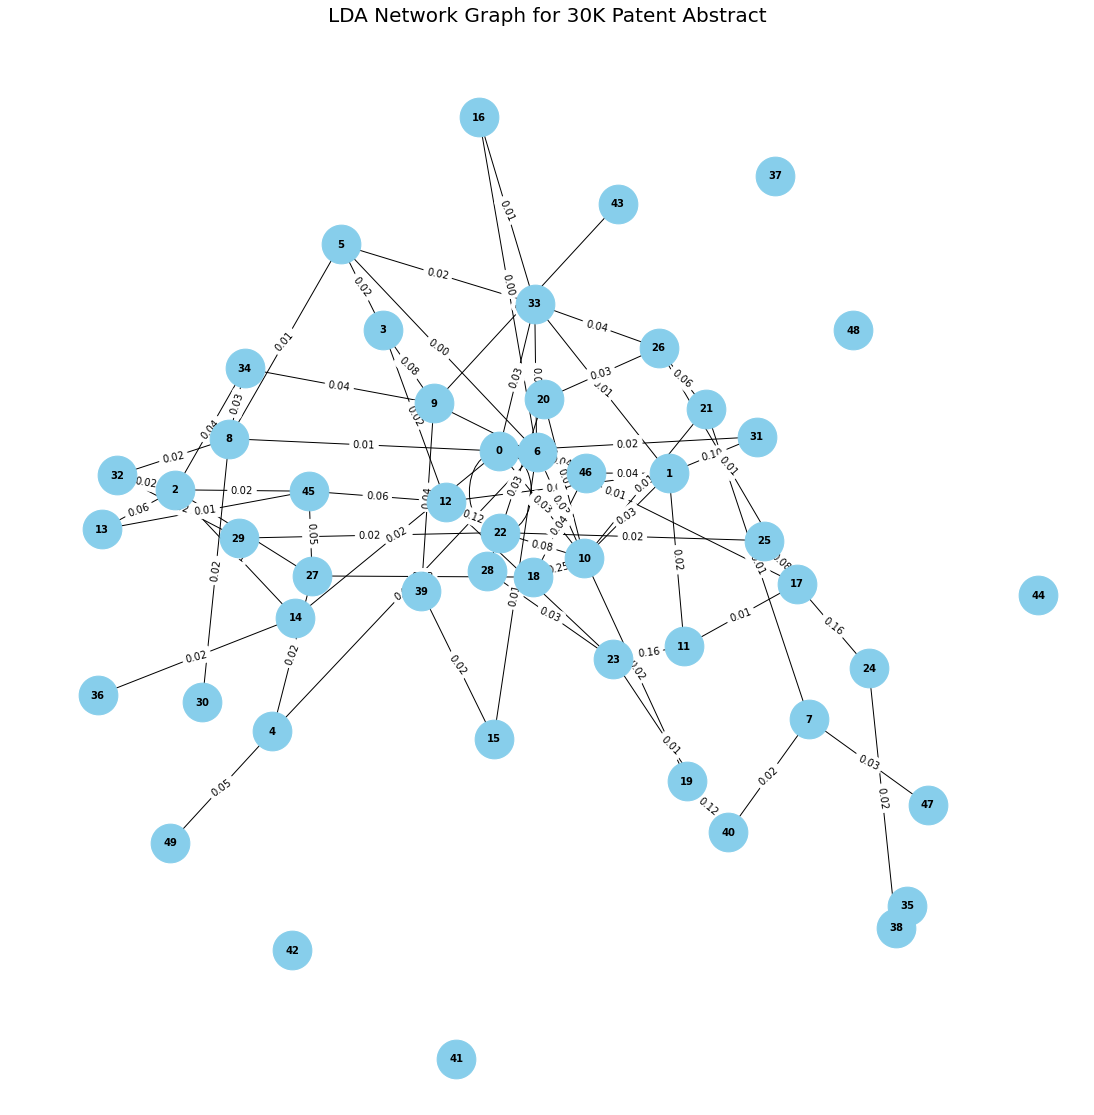

In [23]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Get all the topic words
all_topic_words = " ".join([word for topic in lda_model.show_topics(num_topics=50, formatted=False) for word, _ in topic[1]])

# Create a list of the most frequent words
most_frequent_words = [word for word, count in Counter(all_topic_words.split()).most_common(30)]

# Create an empty graph object
G = nx.Graph()

# Add the nodes (topics) to the graph
for i in range(50):
    G.add_node(i)

# Add the edges (terms) to the graph
for i in range(50):
    topic_words = lda_model.show_topic(i, topn=10)
    for word, prob in topic_words:
        if word in most_frequent_words:
            j = most_frequent_words.index(word)
            G.add_edge(i, j, weight=prob)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): "{:.2f}".format(d["weight"]) for i, j, d in G.edges(data=True)})
plt.gcf().set_size_inches(15, 15)
plt.title("LDA Network Graph for 30K Patent Abstract",fontsize=20)
plt.show()

In [15]:
#prediction

In [16]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

In [17]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]

# Tokenize the new abstract and apply n-gram (1,3)
query_tokens = trigram_phrases[bigram_phrases[new_Abstract.split()]]

# Create a bag of words representation of the query
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query using the trained LDA model
query_lda = lda_model[query_bow]

# Print the topic distribution for the query
print(query_lda)

[(9, 0.40179655), (11, 0.04441583), (15, 0.10911182), (22, 0.2503859), (25, 0.02073174), (39, 0.04239415), (49, 0.113962226)]


In [18]:
# Print the most probable topic for the query
most_probable_topic = max(query_lda, key=lambda item: item[1])[0]
print(f"Most probable topic: {most_probable_topic}")

Most probable topic: 9


In [19]:
# Sort the list of topics in descending order based on their weights
sorted_topics = sorted(query_lda, key=lambda item: item[1], reverse=True)

# Select the top 3 topics from the sorted list
top_topics = [topic[0] for topic in sorted_topics[:3]]

# Print the 3 most probable topics
print(f"3 most probable topics: {top_topics}")

3 most probable topics: [9, 22, 49]


In [21]:
# Print the most significant words for the topic
top_words = lda_model.show_topic(9, topn=10)
print(f"Most probable topic for the query: {' '.join(word for word, _ in top_words)}")

Most probable topic for the query: network packet call access service address voice telephone routing based
